In [1]:
from google.colab import files
uploaded = files.upload()

Saving 대출 통계_2021.xlsx to 대출 통계_2021 (2).xlsx
Saving 대출통계_2018.xlsx to 대출통계_2018 (2).xlsx


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') #런타임 재시작


# 데이터 전처리

In [3]:
new = pd.read_excel('대출 통계_2021.xlsx')

new.iloc[0][0] = '성별'
new = new.rename(columns=new.iloc[0]) # 첫번째 행으로 컬럼명 지정
new = new.drop(new.index[0]) # 행 삭제

new = new.drop('기타',axis=1) #기타 행 모두 0이므로 의미 없음 삭제
new = new.drop(17) #기타 열 또한 의미없는 데이터로 취급 삭제
new = new.drop(columns='성별',axis=1)

new.reset_index(drop=True, inplace=True)

new = new.astype({'총류':'int64', '철학':'int64',
                  '종교':'int64', '사회':'int64',
                  '순수':'int64', '기술':'int64',
                  '예술':'int64', '언어':'int64',
                  '문학':'int64', '역사':'int64',
                  '합계':'int64'})

new = new.groupby('연령대').sum()
new #소계에서의 차이가 있는데 탈퇴 회원의 대출 정보가 포함된 것 이므로 현재 프레임의 소계로 판단

,총류,철학,종교,사회,순수,기술,예술,언어,문학,역사,합계
연령대,,,,,,,,,,,
20대,1525,1720,300,5215,643,1608,1668,444,7763,927,21813
30대,2555,3032,683,10376,1191,3998,2460,822,14982,2151,42250
40대,3345,3629,838,13885,3521,5229,4394,1542,27550,4144,68077
50~64세,2997,3603,1496,9542,1564,3982,4237,966,15326,3169,46882
65세이상,559,1281,727,2492,440,1127,2183,559,7062,1974,18404
소계,11245,13568,4104,42477,7908,16407,15329,4473,75972,12940,204423
아동(0-13),212,177,44,622,362,336,239,86,2236,381,4695
청소년(14-19),52,126,16,345,187,127,148,54,1053,194,2302


In [4]:
old = pd.read_excel('대출통계_2018.xlsx')

old.iloc[0][0] = '성별'
old = old.rename(columns=old.iloc[0])
old = old.drop(old.index[0])

old = old.drop([10,12,19]) #아동, 청소년 nan값이랑 기타 삭제
old = old.drop(columns='성별',axis=1)

old=old.replace('아동','아동(0-13)')
old=old.replace('청소년','청소년(14-19)')

old = old.astype({'총류':'int64', '철학':'int64',
                  '종교':'int64', '사회':'int64',
                  '순수':'int64', '기술':'int64',
                  '예술':'int64', '언어':'int64',
                  '문학':'int64', '역사':'int64',
                  '합계':'int64'})

old = old.groupby('연령대').sum()
old

,총류,철학,종교,사회,순수,기술,예술,언어,문학,역사,합계
연령대,,,,,,,,,,,
20대,2431,3098,700,8426,993,3273,4452,1559,15909,3718,44559
30대,4870,5635,1421,17441,2148,8736,8013,3295,31409,9513,92481
40대,6414,5683,1635,17701,4682,8950,12298,3630,37661,9884,108538
50~64세,2581,4399,1796,10799,1366,5059,9038,2029,21022,5956,64045
65세이상,592,1684,962,2427,506,1209,5250,761,8967,2495,24853
소계,17429,21047,6658,58562,10931,28065,40406,11617,121454,32863,349032
아동(0-13),244,214,99,909,727,424,583,181,3772,931,8084
청소년(14-19),297,334,45,859,509,414,772,162,2714,366,6472


# 소계 비교

In [5]:
a=old.loc[['소계']]
b=new.loc[['소계']]
all_genre = pd.concat([a,b])
all_genre.set_index(keys=[['2018','2021']],inplace=True)
all_genre = all_genre.transpose()
all_genre

,2018,2021
총류,17429,11245
철학,21047,13568
종교,6658,4104
사회,58562,42477
순수,10931,7908
기술,28065,16407
예술,40406,15329
언어,11617,4473
문학,121454,75972
역사,32863,12940


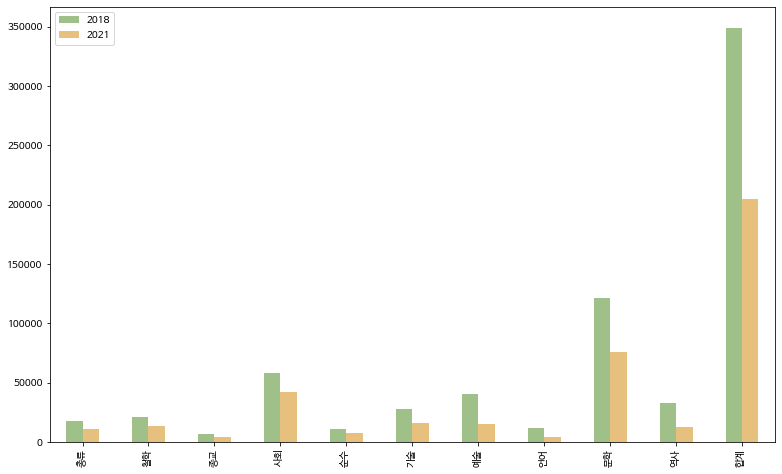

In [6]:
all_genre.plot(kind='bar',figsize=(13,8),color = ['#9FC088','#E8C07D'])
plt.show()

In [7]:
old = old.drop('소계')
new = new.drop('소계')

# 나이대별 비교

In [8]:
c = old.iloc[:,-1:]
d = new.iloc[:,-1:]
all_age = pd.concat([c,d],axis=1)
all_age.columns = ['2018','2021']
all_age

,2018,2021
연령대,,
20대,44559,21813
30대,92481,42250
40대,108538,68077
50~64세,64045,46882
65세이상,24853,18404
아동(0-13),8084,4695
청소년(14-19),6472,2302


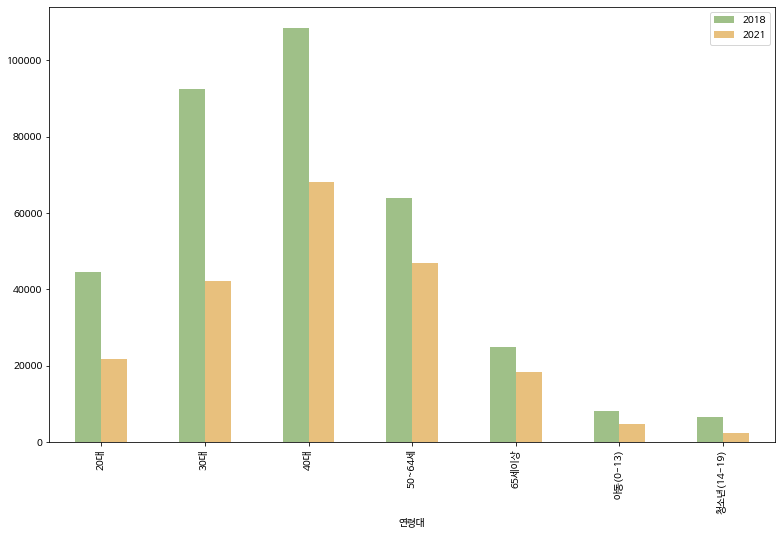

In [9]:
all_age.plot(kind='bar',figsize=(13,8),color = ['#9FC088','#E8C07D'])
plt.show()

# 연령별 장르별 대출건수

In [10]:
old_ = old.iloc[:,:-1]
new_ = new.iloc[:,:-1]

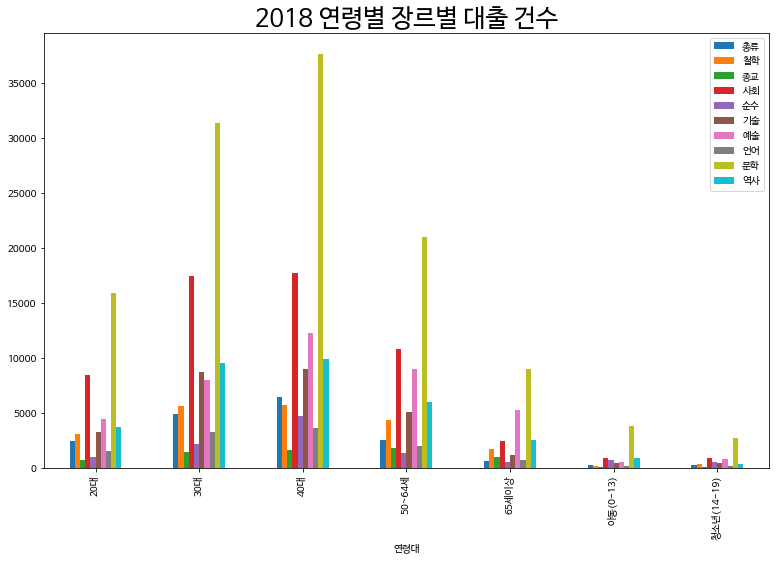

In [11]:
old_.plot(kind='bar',figsize=(13,8))
plt.title('2018 연령별 장르별 대출 건수',fontsize=25)
plt.show()

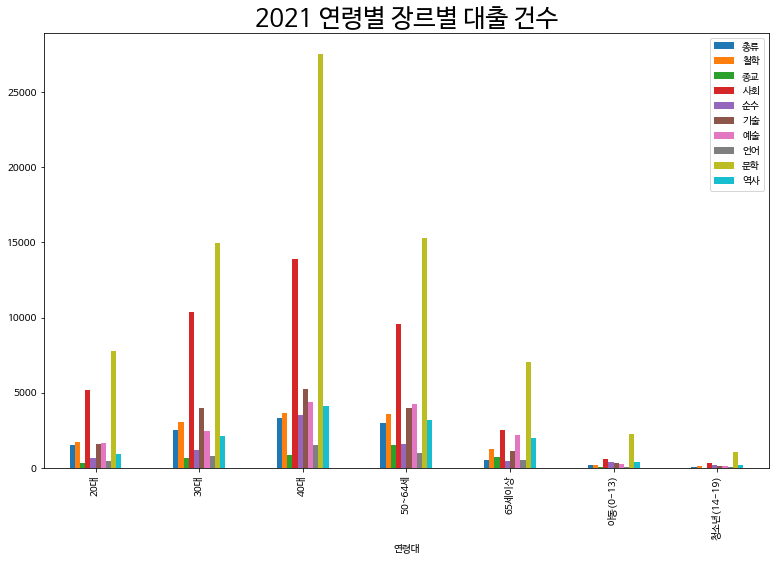

In [12]:
new_.plot(kind='bar',figsize=(13,8))
plt.title('2021 연령별 장르별 대출 건수',fontsize=25)
plt.show()